In [7]:
# Import required libraries
import pandas as pd
import numpy as np
import hashlib
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# Structured dataset: employee records
structured_data = pd.DataFrame({
    "EmployeeID": [101, 102, 103, 104, 104],  # duplicate ID
    "Name": ["Alice", "Bob", "Charlie", "David", "David"],
    "Dept": ["IT", "Finance", "IT", "HR", "HR"]
})

# Semi-structured dataset: JSON-like
semi_structured_data = [
    {"user": "alice", "login_count": 5},
    {"user": "bob", "login_count": 12},
    {"user": "charlie", "login_count": None}  # missing value
]

# Unstructured dataset: text logs
unstructured_data = [
    "INFO: User alice logged in",
    "ERROR: Disk failure at 10:32",
    "INFO: User bob logged out"
]

# Streaming dataset: simulated IoT sensor readings
streaming_data = pd.DataFrame({
    "timestamp": pd.date_range("2025-01-01", periods=10, freq="T"),
    "temperature": [22, 23, 22, 100, 23, 22, 21, 22, 23, 22]  # anomaly at 100
})


/var/folders/yt/xyg7l3rn7nd05d99vc7z_pmw0000gn/T/ipykernel_868/378435064.py:24: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  "timestamp": pd.date_range("2025-01-01", periods=10, freq="T"),


In [9]:
# Detect duplicate Employee IDs
duplicates = structured_data[structured_data.duplicated("EmployeeID")]
print("Duplicate IDs:\n", duplicates)


Duplicate IDs:
    EmployeeID   Name Dept
4         104  David   HR


In [10]:
# Simple statistical anomaly detection
mean_temp = streaming_data["temperature"].mean()
std_temp = streaming_data["temperature"].std()

# Flag values more than 3 std deviations away
streaming_data["is_outlier"] = np.abs(streaming_data["temperature"] - mean_temp) > 2*std_temp
streaming_data


,timestamp,temperature,is_outlier
0,2025-01-01 00:00:00,22,False
1,2025-01-01 00:01:00,23,False
2,2025-01-01 00:02:00,22,False
3,2025-01-01 00:03:00,100,True
4,2025-01-01 00:04:00,23,False
5,2025-01-01 00:05:00,22,False
6,2025-01-01 00:06:00,21,False
7,2025-01-01 00:07:00,22,False
8,2025-01-01 00:08:00,23,False
9,2025-01-01 00:09:00,22,False


In [11]:
# Example: embedding vectors consistency
matrix = np.array([[1,2,3],[4,5,6],[7,8,9]])
# Check rank (should equal min(rows, cols) if full rank)
rank = np.linalg.matrix_rank(matrix)
print("Matrix Rank:", rank)


Matrix Rank: 2


Is network connected? True


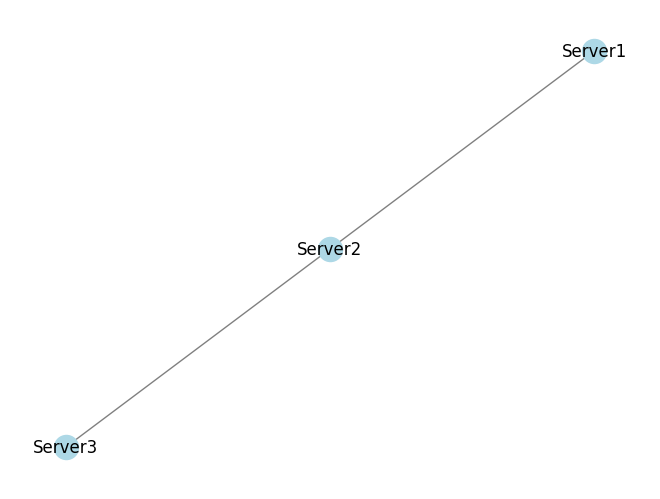

In [12]:
# Build a simple IT network graph
G = nx.Graph()
G.add_edges_from([("Server1","Server2"),("Server2","Server3")])  # missing link

# Check connectivity
print("Is network connected?", nx.is_connected(G))

# Visualize
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray")
plt.show()


In [13]:
# Example: hash of a log entry
log_entry = "ERROR: Disk failure at 10:32"
hash_value = hashlib.sha256(log_entry.encode()).hexdigest()
print("Log Hash:", hash_value)


Log Hash: b7dac9d8f4ab44123abd1c181f8d0644b0a13e1614e3b72b8eb3586cd5b4c721


In [14]:
# Schema validation: check for missing values
structured_data.isnull().sum()

# Sampling check
sample = structured_data.sample(2)
print("Sample for manual verification:\n", sample)


Sample for manual verification:
    EmployeeID     Name Dept
2         103  Charlie   IT
0         101    Alice   IT


Real Example 

Used a dataset from a publicly available API of Binance public API

In [15]:
import pandas as pd
import numpy as np
import requests
import time
import hashlib
import matplotlib.pyplot as plt
import seaborn as sns


/Users/amandeepsinghreen/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [16]:
def fetch_crypto_price(symbol="BTCUSDT"):
    url = f"https://api.binance.com/api/v3/ticker/price?symbol={symbol}"
    response = requests.get(url)
    return float(response.json()["price"])

# Collect streaming data for 1 minute
prices = []
timestamps = []

for i in range(6):  # 6 samples, every 10 seconds
    price = fetch_crypto_price()
    prices.append(price)
    timestamps.append(pd.Timestamp.now())
    print(f"{timestamps[-1]} - BTC Price: {price}")
    time.sleep(10)

streaming_data = pd.DataFrame({"timestamp":timestamps, "price":prices})


2025-12-10 14:31:46.147194 - BTC Price: 92624.31
2025-12-10 14:31:56.321574 - BTC Price: 92617.74
2025-12-10 14:32:06.493393 - BTC Price: 92585.55
2025-12-10 14:32:16.679439 - BTC Price: 92585.55
2025-12-10 14:32:26.857172 - BTC Price: 92585.54
2025-12-10 14:32:37.032788 - BTC Price: 92591.2


In [17]:
# Check for duplicate timestamps (Set Theory)
duplicates = streaming_data[streaming_data.duplicated("timestamp")]
print("Duplicate timestamps:\n", duplicates)

Duplicate timestamps:
 Empty DataFrame
Columns: [timestamp, price]
Index: []


In [18]:
# Simple statistical anomaly detection 
mean_price = streaming_data["price"].mean()
std_price = streaming_data["price"].std()

streaming_data["is_outlier"] = np.abs(streaming_data["price"] - mean_price) > 2*std_price
streaming_data


,timestamp,price,is_outlier
0,2025-12-10 14:31:46.147194,92624.31,False
1,2025-12-10 14:31:56.321574,92617.74,False
2,2025-12-10 14:32:06.493393,92585.55,False
3,2025-12-10 14:32:16.679439,92585.55,False
4,2025-12-10 14:32:26.857172,92585.54,False
5,2025-12-10 14:32:37.032788,92591.20,False


In [19]:
# Check matrix rank of price data (Linear Algebra)
matrix = np.array([streaming_data["price"].values])
rank = np.linalg.matrix_rank(matrix)
print("Matrix Rank:", rank)


Matrix Rank: 1


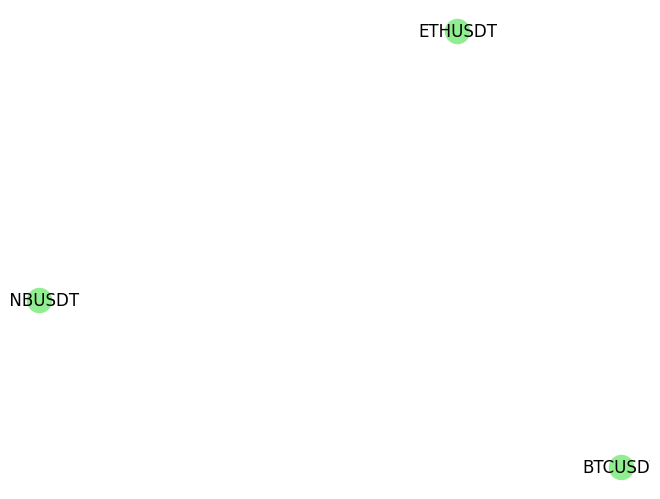

In [21]:
# Build correlation graph of multiple crypto assets (Graph Theory)

import networkx as nx

assets = ["BTCUSDT","ETHUSDT","BNBUSDT"]
G = nx.Graph()
for asset in assets:
    G.add_node(asset)

# Add edges if correlation > 0.8
df_assets = pd.DataFrame()
for asset in assets:
    df_assets[asset] = [fetch_crypto_price(asset) for _ in range(5)]

corr = df_assets.corr()
for i in corr.index:
    for j in corr.columns:
        if i != j and corr.loc[i,j] > 0.8:
            G.add_edge(i,j)

nx.draw(G, with_labels=True, node_color="lightgreen")
plt.show()


In [22]:
# Hash of a streaming data record (Cryptography / Hashing)

record = str(streaming_data.iloc[0].to_dict())
hash_value = hashlib.sha256(record.encode()).hexdigest()
print("Record Hash:", hash_value)


Record Hash: 20360295f1929845f90856b25eb9a32ad22df34adfd241a4cd4cce918227a3f2


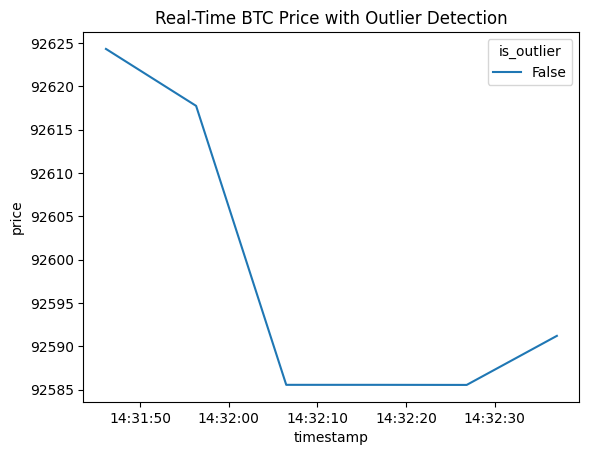

In [23]:
sns.lineplot(data=streaming_data, x="timestamp", y="price", hue="is_outlier")
plt.title("Real-Time BTC Price with Outlier Detection")
plt.show()
